<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/b%C3%A0i_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
order_density=ctrl.Antecedent(np.arange(0,100,1),'order_density')
delivery_urgency=ctrl.Antecedent(np.arange(0,100,1),'delivery_urgency')
drivers=ctrl.Antecedent(np.arange(0,100,1),'drivers')
traffic=ctrl.Antecedent(np.arange(0,100,1),'traffic')
profit=ctrl.Antecedent(np.arange(0,100,1),'profit')
#output
number=ctrl.Consequent(np.arange(0,100,1),'number')
delivery_priority=ctrl.Consequent(np.arange(0,100,1),'delivery_priority')

In [ ]:
order_density['l']=fuzz.trimf(order_density.universe,[0,0,50])
order_density['m']=fuzz.trimf(order_density.universe,[25,50,70])
order_density['h']=fuzz.trimf(order_density.universe,[60,100,100])
delivery_urgency['l']=fuzz.trimf(delivery_urgency.universe,[0,25,50])
delivery_urgency['m']=fuzz.trimf(delivery_urgency.universe,[40,60,80])
delivery_urgency['h']=fuzz.trimf(delivery_urgency.universe,[70,90,100])
drivers['l']=fuzz.trimf(drivers.universe,[0,0,50])
drivers['m']=fuzz.trimf(drivers.universe,[30,50,100])
drivers['h']=fuzz.trimf(drivers.universe,[80,100,100])
traffic['l']=fuzz.trimf(traffic.universe,[0,0,50])
traffic['m']=fuzz.trimf(traffic.universe,[35,50,70])
traffic['h']=fuzz.trimf(traffic.universe,[65,80,100])
profit['l']=fuzz.trimf(profit.universe,[0,0,50])
profit['m']=fuzz.trimf(profit.universe,[25,50,75])
profit['h']=fuzz.trimf(profit.universe,[65,80,100])
number['f']=fuzz.trimf(number.universe,[0,25,50])
number['s']=fuzz.trimf(number.universe,[25,50,75])
number['m']=fuzz.trimf(number.universe,[50,75,100])
delivery_priority['l']=fuzz.trimf(delivery_priority.universe,[0,30,50])
delivery_priority['m']=fuzz.trimf(delivery_priority.universe,[45,50,90])
delivery_priority['h']=fuzz.trimf(delivery_priority.universe,[80,95,100])


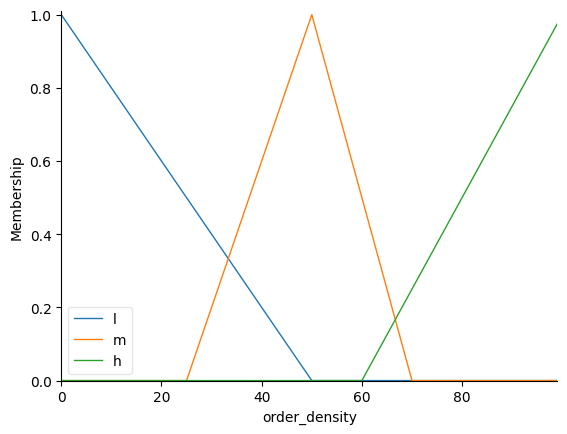

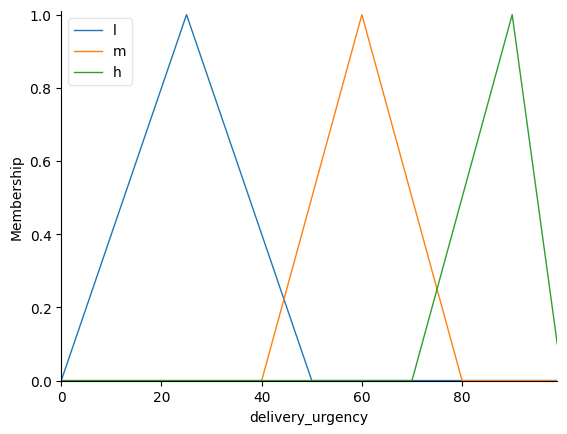

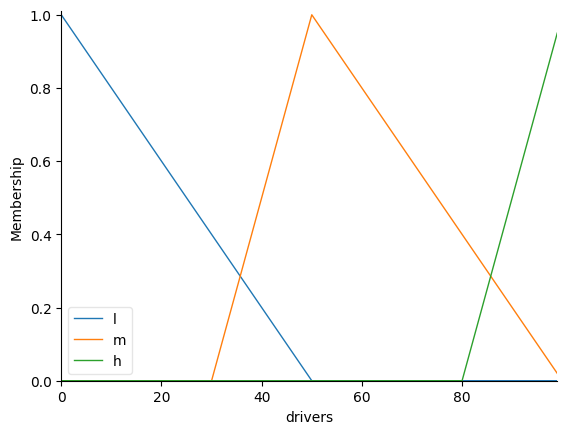

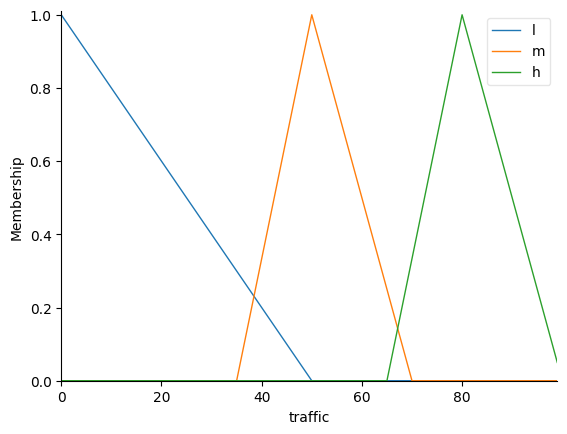

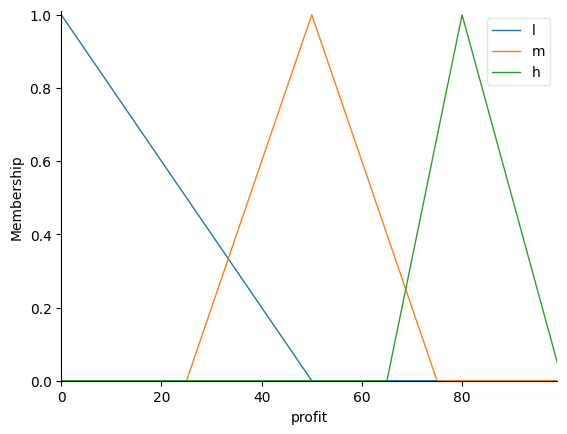

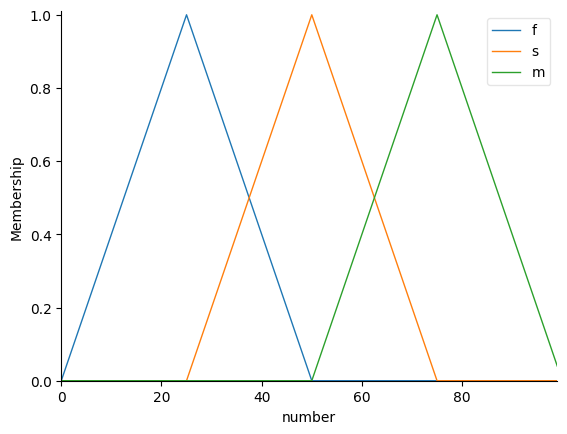

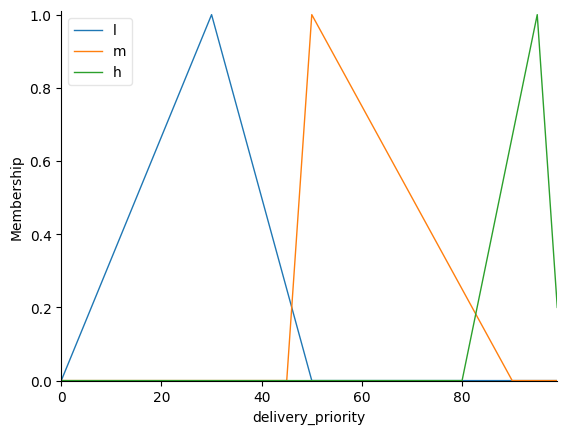

In [ ]:
order_density.view()
delivery_urgency.view()
drivers.view()
traffic.view()
profit.view()
number.view()
delivery_priority.view()

In [ ]:
#luật kết hợp đơn hàng
rule1 = ctrl.Rule(order_density['h']&drivers['l']&traffic['l'],number['m'])
rule2 = ctrl.Rule(order_density['m']&traffic['h']&delivery_urgency['m'],number['s'])
rule3 = ctrl.Rule(drivers['h']&order_density['h']&profit['m'],number['s'])
rule4 = ctrl.Rule(order_density['l']&delivery_urgency['h']&traffic['h'],number['s'])
rule5 = ctrl.Rule(profit['h']&delivery_urgency['h']&traffic['h'],number['s'])
#luật ưu tiên giao hàng
rule6 = ctrl.Rule(delivery_urgency['h']&profit['h'],delivery_priority['h'])
rule7 = ctrl.Rule(delivery_urgency['m']&traffic['m'],delivery_priority['m'])
rule8 = ctrl.Rule(delivery_urgency['l']&order_density['h']&profit['l'],delivery_priority['l'])

74.95542325013356
91.41554357592092


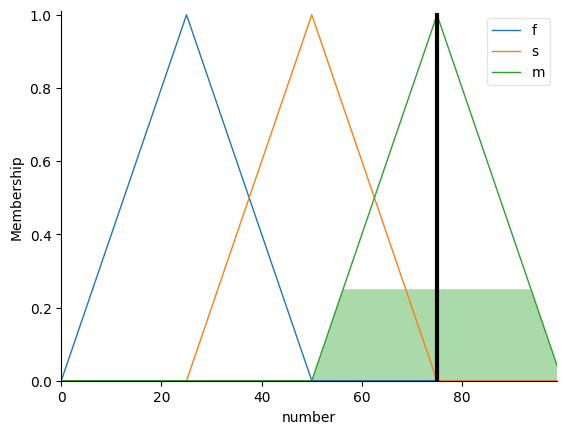

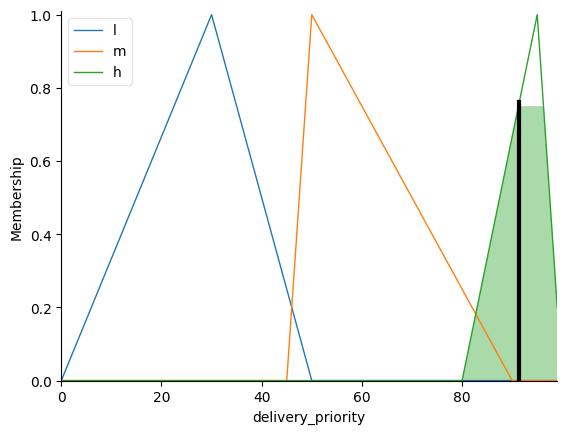

In [ ]:
abc=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
sim=ctrl.ControlSystemSimulation(abc)
sim.input['order_density']=70
sim.input['delivery_urgency']=85
sim.input['drivers']=20
sim.input['traffic']=30
sim.input['profit']=85
sim.compute()
print(sim.output['number'])
print(sim.output['delivery_priority'])
number.view(sim)
delivery_priority.view(sim)